# <b> Validere Technical Interview Assignment </b> <br>
## <b> By Rutvik Bhende </b>


## Topic #5 - What qualities of crude oil lead to pipeline accidents?

Pipelines, albeit considered the safest way to transport Hazardous Liquids (Crude oil, gasoline, refined petroleum products, etc.) [1], pose a significant negative risk to the surrounding environment, physical damage to the pipeline infrastructure, and huge monetary losses for the pipeline operating organizations in an event of an accident. <br>
Historically, thousands of Hazardous Liquid Pipeline accidents have caused hundreds of fatalities & injuries to people and have costed several billion dollars worth of damage around the world. <br>
In this analytical study, we will explore the dataset provided by PHMSA (Pipeline and Hazardous Material Safety Administration) [2].The dataset contains accident records between the years 2010 and 2017 [3]. <br>
An examination of the Hazardous liquids' that are most prevalent in the historical accidents data is provided, and also the main standing cause for these accident occurences is evaluated. <br>
Crude oil accidents and their causes, in particular, are taken into consideration and are compared to other hazardous liquids. <br>
Then we evaluate some physical and chemical properties of crude oil, and the way they are transported in pipelines. <br>
A discussion on the current and recommended regulations in transporting crude oil over pipelines is provided. <br>
A time-series analysis is put forth that discusses the frequency of crude oil-related accidents and its associated pipeline shutdowns. The losses in crude oil due to accidents over the years examined, and a comparative analysis is put forth.




### Data Sources: <br>
United States Department of Transportation's Pipeline and Hazardous Material Safety Administration (PHMSA) Dataset. <br>
Obtained from https://www.kaggle.com/usdot/pipeline-accidents [3]


### Preprocessing PHMSA Data: <br>
PHMSA dataset contains records for every hazardous liquid pipeline leak, spill or accident that was reported to the DOT's Pipeline and Hazardous Materials Safety Administration since 2010 until 2017. <br> These records include the accident date and time, pipeline shutdown and restart date and time, pipeline operator and its name, location and cause of accident, the type of hazardous liquids and quantity lost, injuries and fatalities, and its associated costs. <br>
Since we are interested in analyzing the causes of the accidents and what qualities of the hazardous liquids transported contribute to these accidents, we will be discarding the features associated with injuries, fatalities and costs and other non-relevant features like Report IDs. <br>
In the dataset, there were instances of Latitude values being negative and Longitude values being positive. This is impossible because USA is located north of the Equator (all positive Latitude Coordinates) and west of the Prime Meridian (all negative Longitude Coordinates). It is assumed that these were data-entry mistakes, and thus, these values were corrected to their appropriate format. <br>
The date and time strings are converted to a pandas DateTime format for ease of use in Time-series analysis.

In [1]:
from utils.utils import preprocess_phmsa_data
data = preprocess_phmsa_data(config_path='config/config.ini')
print(data.shape)
data.head()

(2795, 25)


,Accident Date/Time,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,...,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Shutdown Date/Time,Restart Date/Time,Public Evacuations
0,2010-01-01 07:15:00,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,NaN,MCPHERSON,MCPHERSON,...,21.00,0.1,0.00,21.0,NO,NO,NO,NaT,NaT,NaN
1,2010-01-04 08:30:00,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,RAYMOND,CUMBERLAND,...,0.12,0.0,0.12,0.0,NO,NO,NaN,NaT,NaT,NaN
2,2010-01-05 10:30:00,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,CALCASIEU,...,2.00,0.0,0.00,2.0,NO,NO,NaN,NaT,NaT,NaN
3,2010-01-06 19:30:00,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SUPERIOR,DOUGLAS,...,0.48,0.0,0.48,0.0,NO,NO,NaN,NaT,NaT,NaN
4,2010-01-07 13:00:00,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SHERMAN,GRAYSON,...,700.00,NaN,698.00,2.0,NO,NO,NO,NaT,NaT,NaN


Thoughts on preprocessed data: <br>
After some preprocessing, we have reduced the dimensionality of the PHMSA dataset from 48 features to 25 features. The reduced dataset still contains 2795 accident occurences but only those features that are relevant to this assignment.


### Distribution Plots of Accidents by Hazardous Liquid types

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid",
        # palette= 'muted',
        # context='notebook'
        )

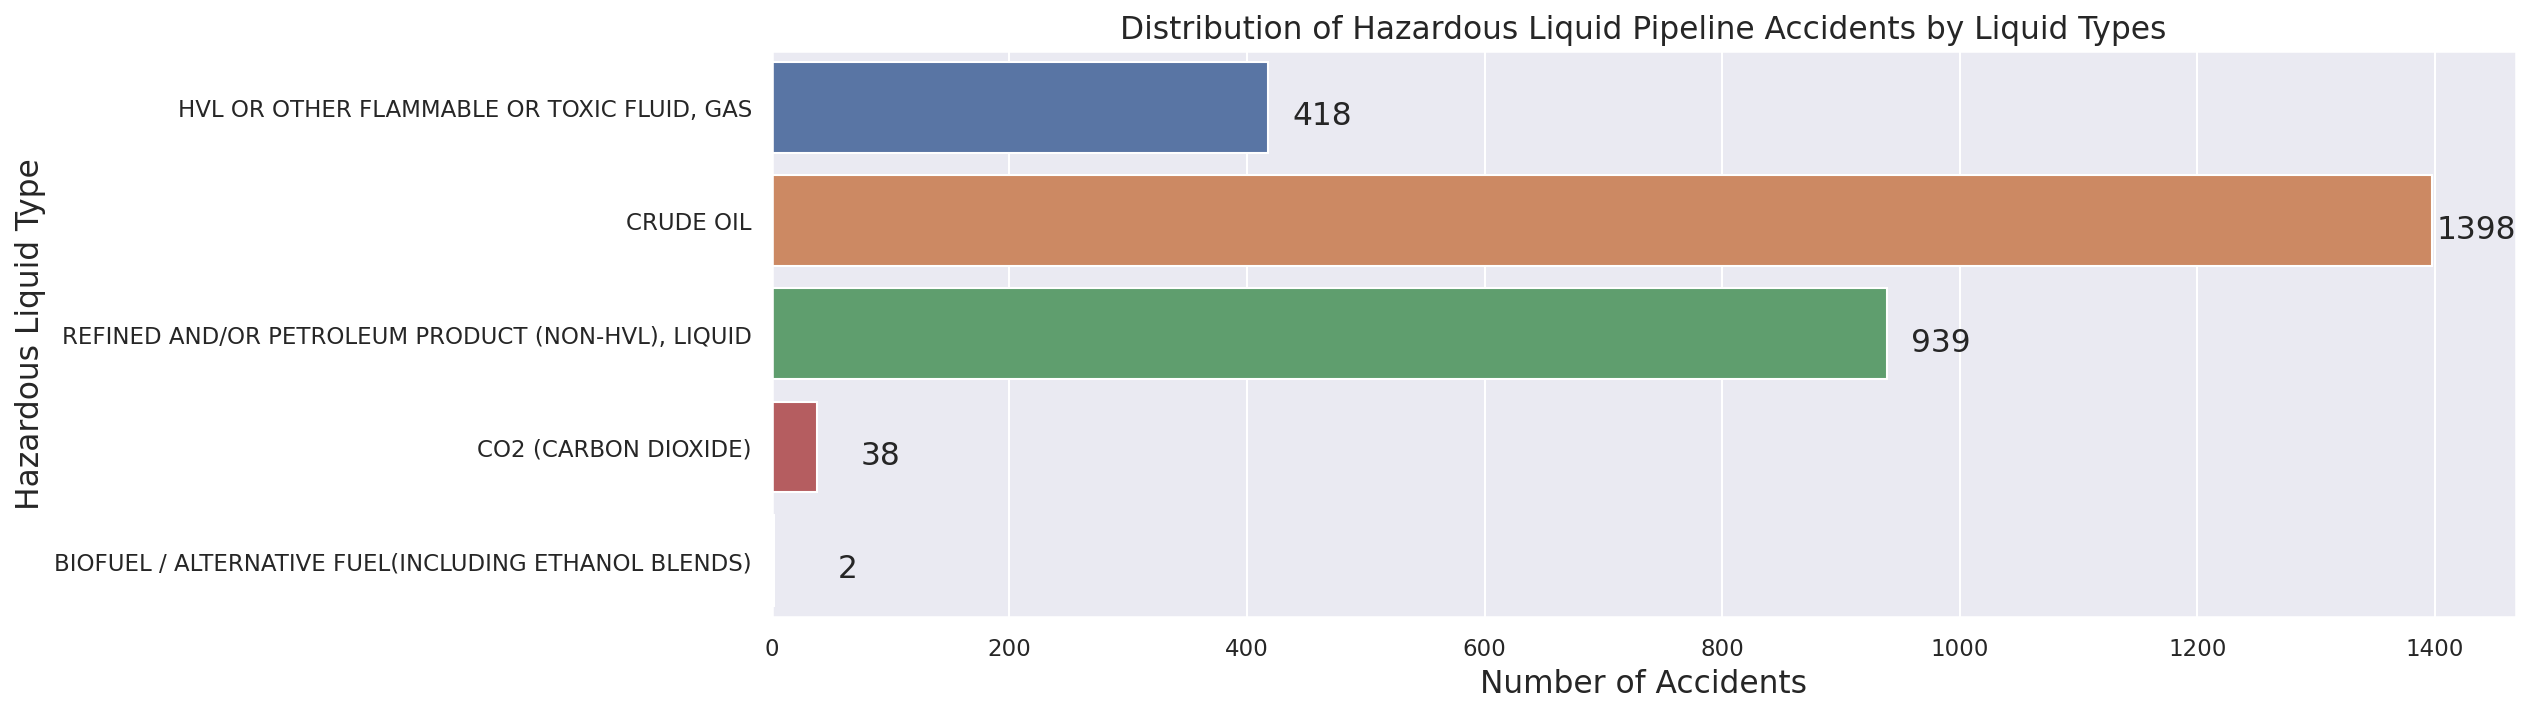

In [3]:
liquids_df = data[['Liquid Type', 'Liquid Subtype']]
f, ax = plt.subplots(1,1, figsize=(15, 5), dpi= 150)
sns.countplot(
    data= liquids_df, 
    y= 'Liquid Type',
    ax= ax
    )
plt.title('Distribution of Hazardous Liquid Pipeline Accidents by Liquid Types', fontsize=15)
plt.xlabel('Number of Accidents', fontsize=15)
plt.ylabel('Hazardous Liquid Type', fontsize=15)

for p in ax.patches:
    ax.annotate(
        int(p.get_width()),
        ((p.get_x() + p.get_width()), p.get_y()), 
        xytext=(40, -30),
        fontsize=15,
        textcoords='offset points', 
        horizontalalignment='right')

Thoughts: <br>
* By plotting a distribution of the number of accident occurences on the basis of types of hazardous liquids being transported, it is found that <b> exactly 50% </b> (1398 out of 2795) of the accident occurences involved transporting Crude oil. 
* Refined Petroleum products came in second with <b> 939 occurences (~33.6%) </b>. 
* High Volatile Liquids (HVL), Flammable and toxic fluids and Gases (LPG, Natural Gas, etc.) contributed to the third-most number of occurences with <b> 418 </b> out of 2795 i.e. <b> about 15% </b> 
* Carbon Dioxide, Biofuels and other alternative fuel blends comprised of less than <b> 1.5% </b> of accident occurences, with only a combined <b> 40 </b> incidents over the 8 year period.

But let's not take this distribution at face value. It may have happened that the commodity losses associated with each of these hazardous liquids are ranked in a different order. A distribution of <b> Net Loss in Barrels</b>  as per the Liquid Types will give a better understanding on the impact of these accidents.

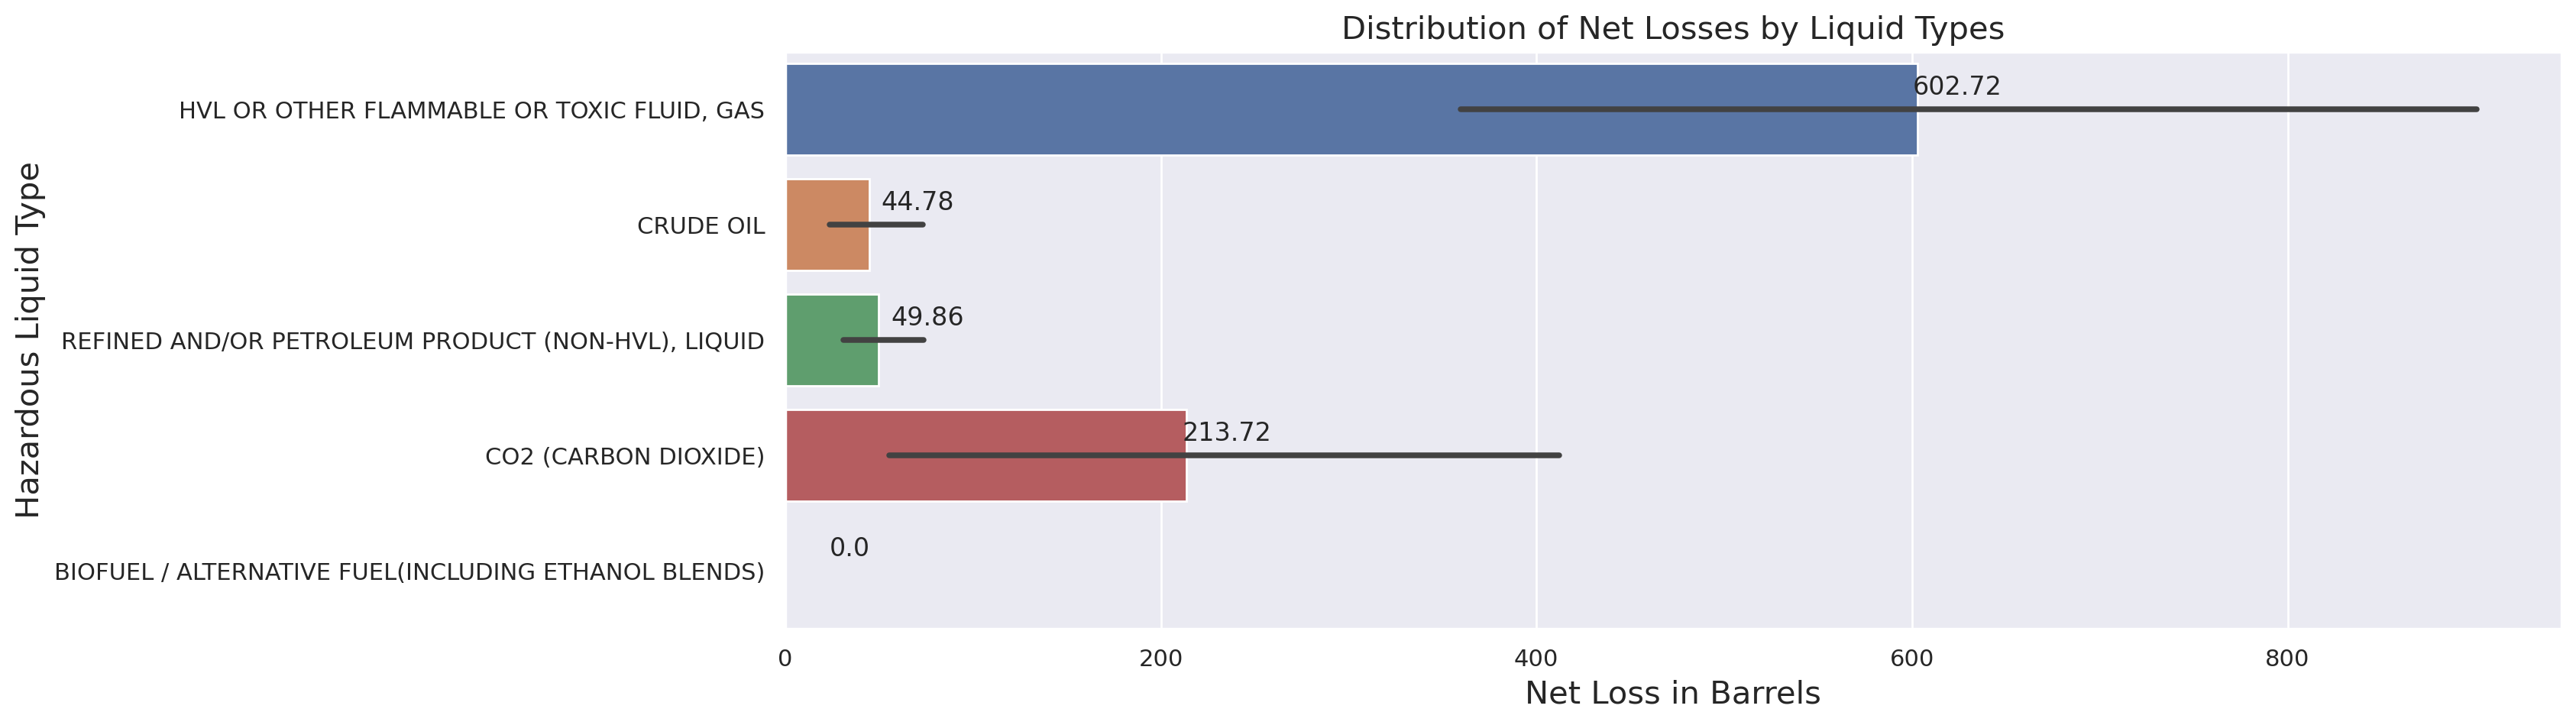

In [4]:
f, ax = plt.subplots(1,1, figsize=(15, 5), dpi= 200)
sns.barplot(
    data= data,
    orient= 'h', 
    x='Net Loss (Barrels)', 
    y= 'Liquid Type',
    ax= ax
    )
plt.title('Distribution of Net Losses by Liquid Types', fontsize=15)
plt.xlabel('Net Loss in Barrels', fontsize=15)
plt.ylabel('Hazardous Liquid Type', fontsize=15)

for p in ax.patches:
    ax.annotate(
        round(float(p.get_width()), 2),
        ((p.get_x() + p.get_width()), p.get_y()), 
        xytext=(40, -15),
        fontsize=12,
        textcoords='offset points', 
        horizontalalignment='right')

Thoughts: <br>
Plotting the Net Losses against the Liquid Types paints a different picture. <br>
* It is found that HVLs, Flammable and toxic fluids and Gases had the most amount of losses in Barrels with an average <b> 603 barrels </b> of liquid lost over time. These liquids also showed high variation in the loss amounts, with the individual values ranging from nearly 350 barrels to almost 900 barrels, depending on the occurence.
* Carbon Dioxide is transported by the compressing it into a supercritical state of a fluid that consists more than 90 percent CO<sub>2</sub> molecules [4]. And this "fluid" contributed to the second-most losses with an average of about <b>214 barrels</b>. The variation in the loss values is also observed to be high, with the values ranging from nearly 50 barrels to over 400 barrels, depending on each incident.
* Crude oil and Non-HVL refined petroleum products had similar amounts of losses averaging <b>45</b> and <b>50</b> barrels respectively. The variations in the losses are not as wide as compared to the previous two liquids.<br> These losses are not as huge as compared to HVLs or CO<sub>2</sub>, but are significant nonetheless. For instance, Crude oil with a loss of 44.78 barrels amounts to over <b> 7000 litres </b> of Crude oil lost on average. 

Let's dive deeper into analyzing Crude Oil..

In [5]:
# Obtain the number of Crude Oil subtypes present in the dataset
crude_oil_df = data[data['Liquid Type'] == 'CRUDE OIL']
crude_oil_subtypes = crude_oil_df['Liquid Subtype'].unique()
crude_oil_subtypes = [x for x in crude_oil_subtypes if ~np.isnan(x)]
# print(f"{len(crude_oil_df)} accidents are associated with Crude oil pipelines.")
print(f"{len(crude_oil_subtypes)} subtypes of Crude oil are present in the PHMSA data.")


0 subtypes of Crude oil are present in the PHMSA data.


Thoughts: <br>
By listing the number of subtypes of Crude Oil that are transported and that resulted in accidents, it is realized that there are no Crude Oil subtypes present in the dataset, and hence, the dataset fails to provide another layer of dimensionality in Crude Oil accident occurences for a more in-depth analysis. <br>
<br>
Now let's look at the main causes of Crude oil accidents..



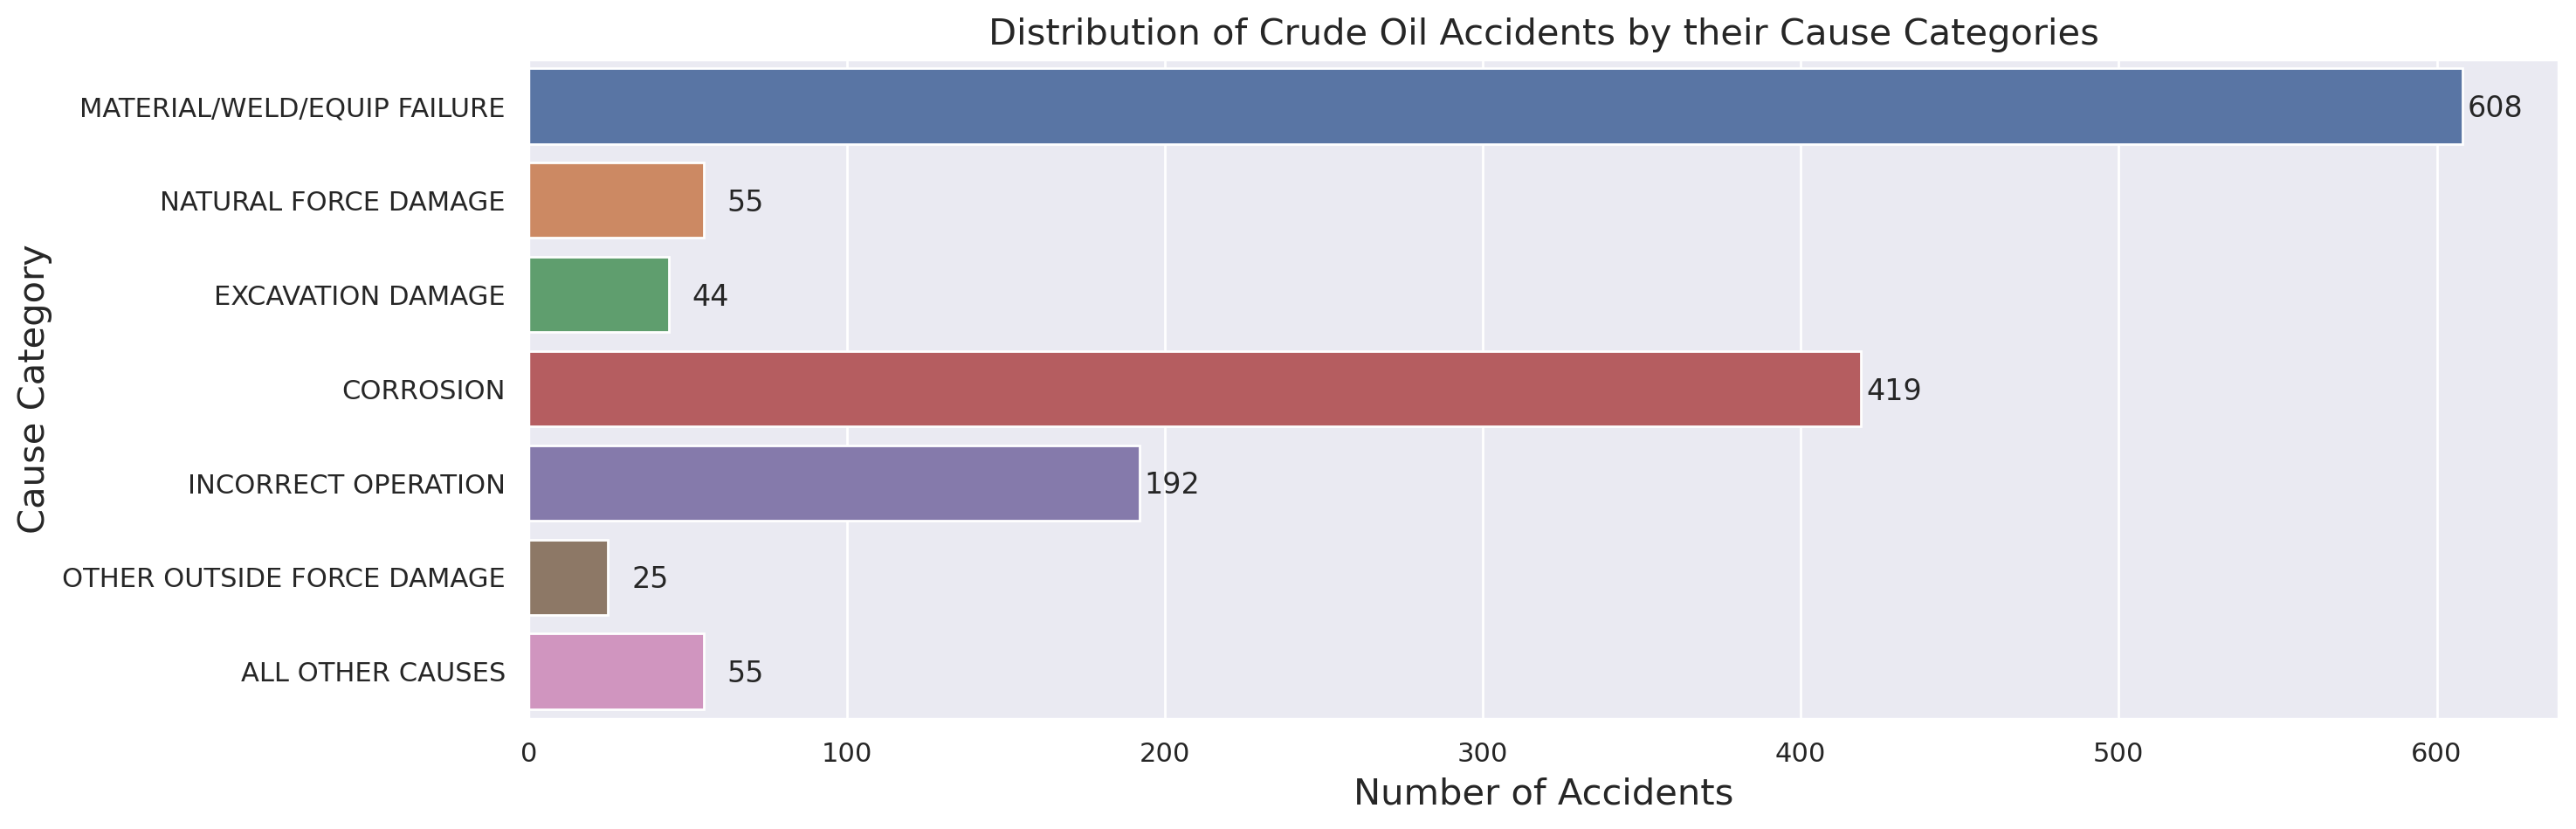

In [6]:
f, ax = plt.subplots(1,1, figsize=(15, 5), dpi= 200)
sns.countplot(
    data= crude_oil_df, 
    y= 'Cause Category',
    ax= ax
    )
plt.title('Distribution of Crude Oil Accidents by their Cause Categories', fontsize=15)
plt.xlabel('Number of Accidents', fontsize=15)
plt.ylabel('Cause Category', fontsize=15)

for p in ax.patches:
    ax.annotate(
        int(p.get_width()),
        ((p.get_x() + p.get_width()), p.get_y()), 
        xytext=(25, -20),
        fontsize=12,
        textcoords='offset points', 
        horizontalalignment='right')

Thoughts: <br>
By analyzing the causes associated with the Crude oil accident occurences, we get a better idea as to what are the main reasons for these occurences. <br>
* Materials used in the construction of the pipeline, their welding and other equipments used are found to be the cause associated with most number of accidents (<b>608 </b> out of 1398 i.e. nearly <b>43.5%</b>).
* Pipeline Corrosion was the second most prevalent cause that resulted in pipeline accidents with <b>30% </b> of all Crude oil accidents (419 out of 1398) being caused by pipe corrosion.
<br>
Out of all these causes resulting in Pipeline Accidents, the only causes that directly relate to the physical characteristics and chemical composition of Crude Oil being transported is Material Failure and Pipeline Corrosion. <br> Let's see if there are any subcategories within these causes that may provide more insight to this argument.

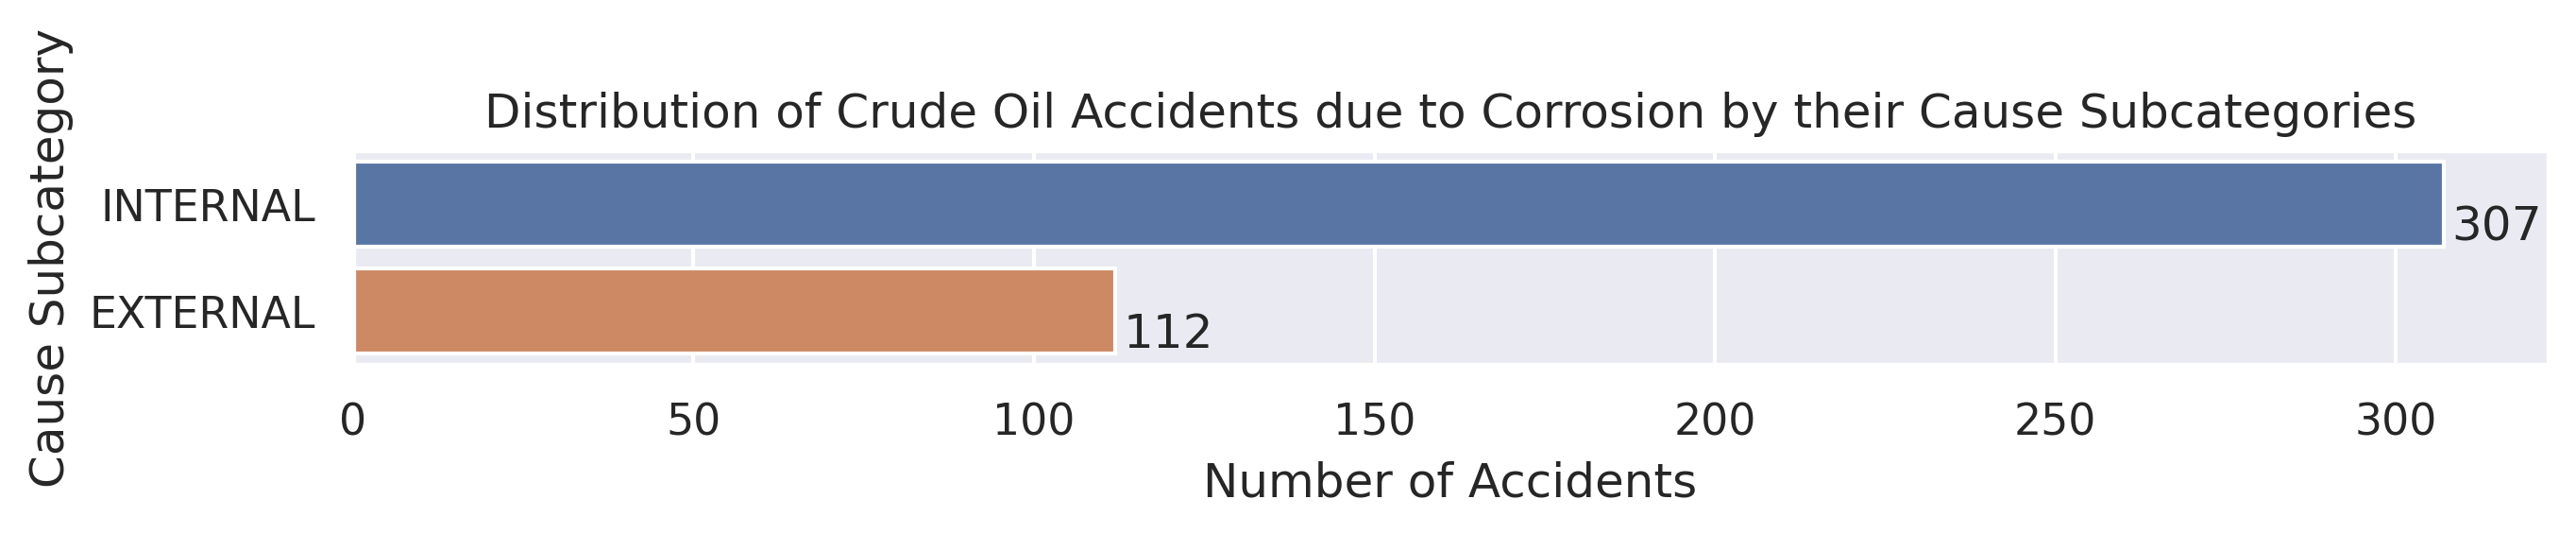

In [7]:
corrosion_df = crude_oil_df[crude_oil_df['Cause Category'] == 'CORROSION']
f, ax = plt.subplots(1,1, figsize=(10, 1), dpi= 300)
sns.countplot(
    data= corrosion_df, 
    y= 'Cause Subcategory',
    ax= ax
    )
plt.title('Distribution of Crude Oil Accidents due to Corrosion by their Cause Subcategories', fontsize=12)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Cause Subcategory', fontsize=12)

for p in ax.patches:
    ax.annotate(
        int(p.get_width()),
        ((p.get_x() + p.get_width()), p.get_y()), 
        xytext=(25, -20),
        fontsize=12,
        textcoords='offset points', 
        horizontalalignment='right')

Thoughts: <br>
The above plot gives a better understanding of Crude Oil accidents that happen due to Pipeline Corrosion, and it is obseverd that the amount of accidents caused by internal pipe corrosion are <b><u> almost 2.75 times </u></b> the amount of accidents due to external pipe corrosion. <br>
The number of Internal Pipe Corrosion occurences stand at <b> 307 </b>. This number is larger than most of the main causes associated with Crude Oil accidents such as Natural Force or excavation damages or incorrect operation. <br>
Since Internal Pipe Corrosion is dependent on the physical and chemical properties of Crude Oil being transported, it is certainly an important factor that must be taken into consideration when developing regulations on the composition of crude oil that is passed in such pipelines.

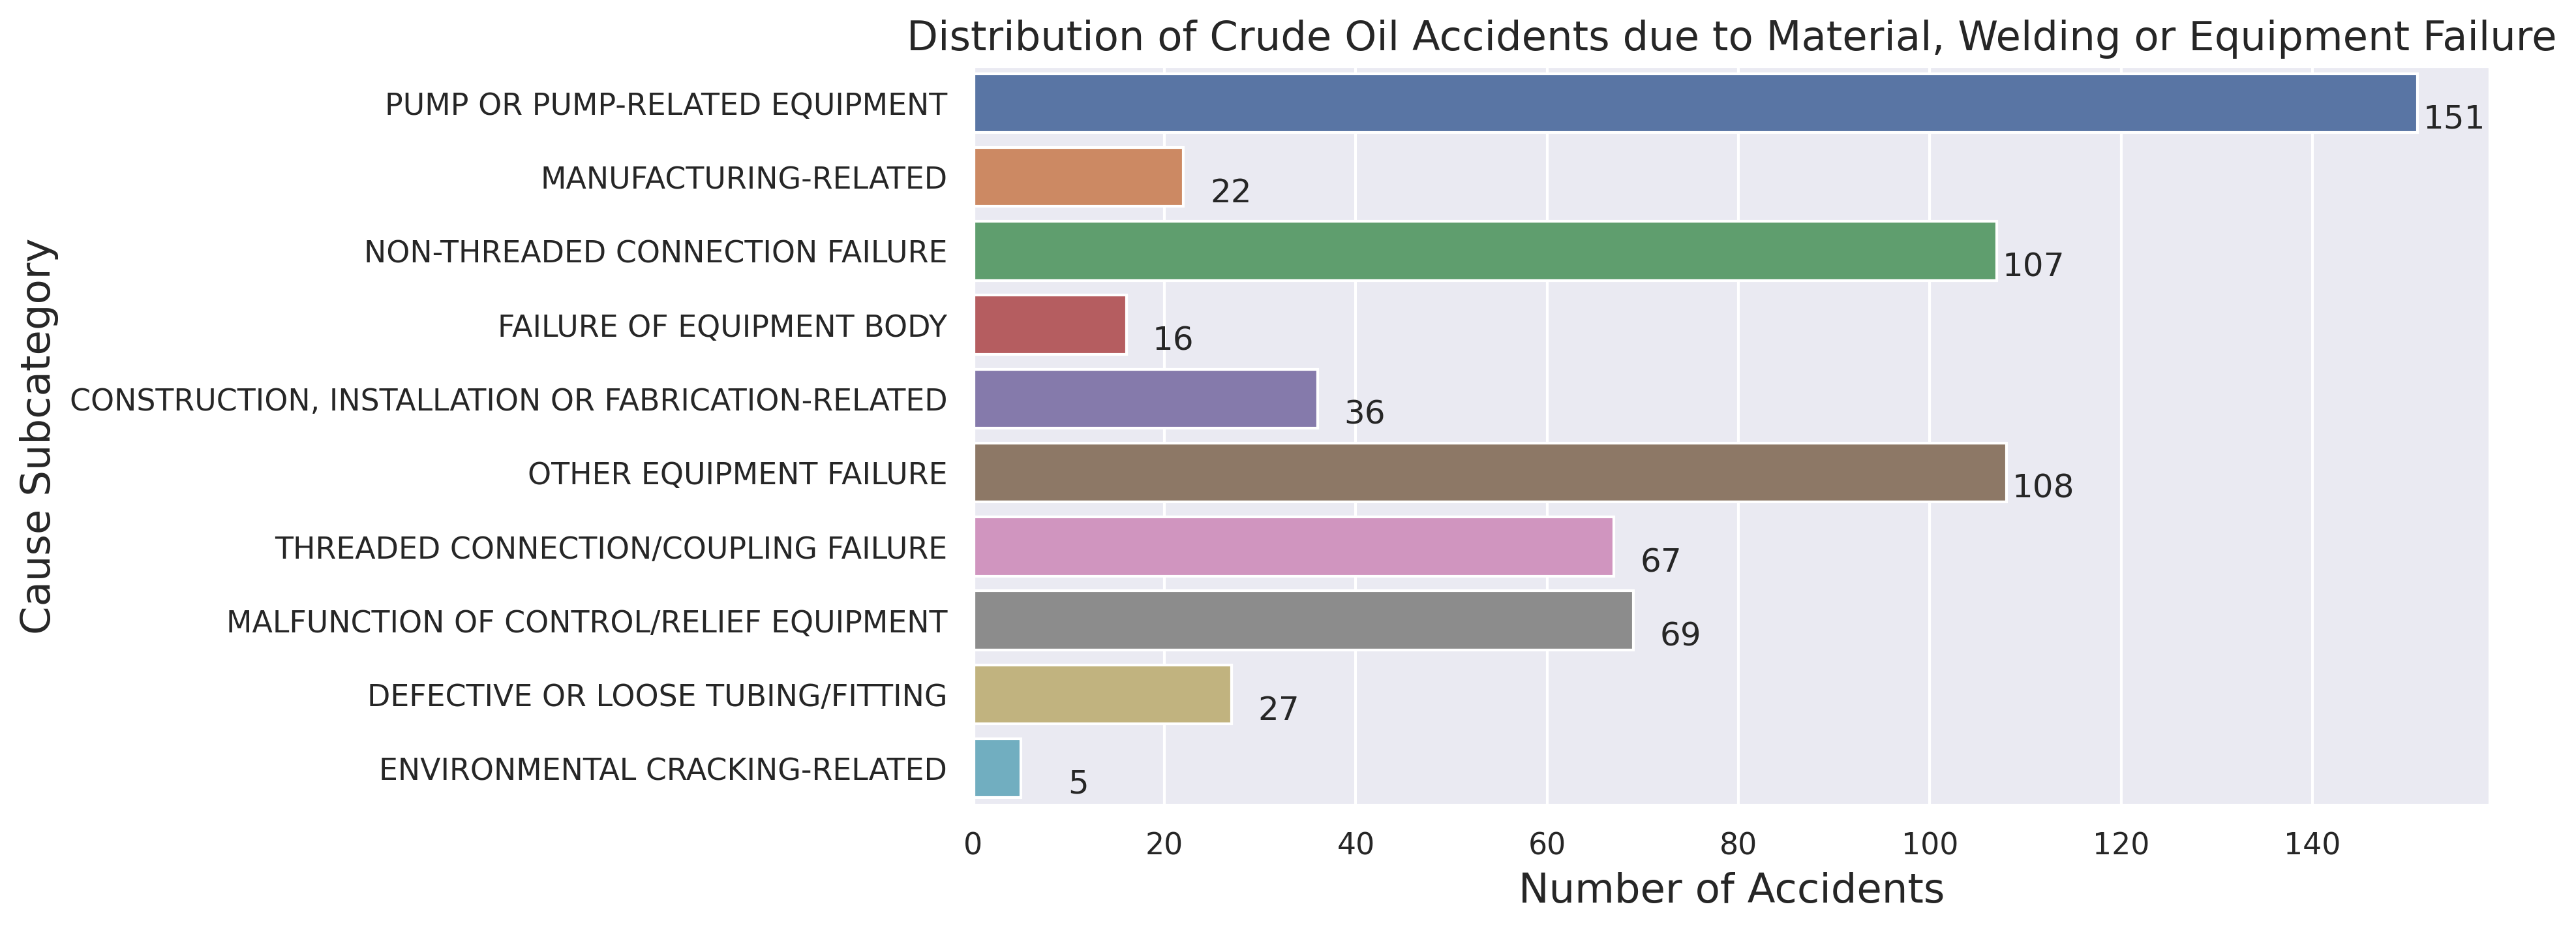

In [8]:
materials_df = crude_oil_df[crude_oil_df['Cause Category'] == 'MATERIAL/WELD/EQUIP FAILURE']
f, ax = plt.subplots(1,1, figsize=(10, 5), dpi= 300)
sns.countplot(
    data= materials_df, 
    y= 'Cause Subcategory',
    ax= ax
    )
plt.title('Distribution of Crude Oil Accidents due to Material, Welding or Equipment Failure', fontsize=15)
plt.xlabel('Number of Accidents', fontsize=15)
plt.ylabel('Cause Subcategory', fontsize=15)

for p in ax.patches:
    ax.annotate(
        int(p.get_width()),
        ((p.get_x() + p.get_width()), p.get_y()), 
        xytext=(25, -20),
        fontsize=12,
        textcoords='offset points', 
        horizontalalignment='right')

Thoughts: <br>
Materials and Equipment failure can be caused by a number of reasons, some of which are categorized in the above plot. <br> 
Pump and pump equipment failure is observed as a dominating cause for accidents, and which can relate to the characteristic of "Vapour Pressure" which will be discussed next.

### Some Physical and Chemical properties of Crude Oil: <br>
1. <b>Density and Specific Gravity (Relative Density)</b> <br>
Specific Gravity or Relative Density liquids is the ratio of the density of a liquid to the density of a given reference material, usually water at its densest (at 4 °C or 39.2 °F). <br>
Density of fresh water is 1.00 g/cm<sup>3</sup> at normal environmental temperatures. Whereas densities of crude oils range from 0.7 to 0.998 g/cm<sup>3</sup>. Also, Seawater has a density of 1.03 g/cm<sup>3</sup>. Thus, even the heaviest, most dense crude oils will float over freshwater. <br>
However, evaporative losses or crude oil 'weathering' lead to significant increases in the density of the oils, and in case of the crude oil component of Bitumen, its density may even exceed that of freshwater. [6] <br>
In an event of offshore spills, the density of crude oils matter significantly as they will be contaminating the water bodies surrounding the pipeline. Initial effects would be the oil floating over the water, and post-weathering, the oil will irrevocably mix with the water bodies, thereby causing losses. <br>
<br>
2. <b>Viscosity</b> <br>
Viscosity is the resistance to the flow of a liquid. In case of crude oils, the viscosity is determined by its contents such as resins and asphaltenes. However, greater the percentage of lighter components such as saturates, and lower the amount of asphaltenes, lower is the viscosity of crude oil [6]. <br>
Temperature of the crude oil also affects its viscosity, with lower temperature causing higher viscosity. For example, a crude oil that flows readily at 50°C can become a slow-moving, highly viscous mass at 10°C [6]. <br>
<br>
3. <b>Flash Point</b> <br>
The Flash Point of crude oil is the temperature at which the oil liquid produces vapors that can be ignited by an open flame. Lower the flash point, higher is the flammability of the liquid.<br> Any liquid with a flash point less than 60°C is considered flammable. For crude oils and other petroleum products, flash points vary a lot and those with low flash points pose a risk of explosion in an event of a spill. <br>
Gasoline, for example is flammable under abmient conditions whereas diluted bitumen isn't flammable until over a day after being spilled (depending on the rate of weathering). [6] <br>
<br>
4. <b>Adhesion</b> <br>
Adhesion or "stickiness" of crude oils is a significant problem, and is reported at several incidents. Adhesion is a property of crude oils that is not measured during their industry-standards analyses. However, there have been developments for procuring a quantitative measure of adhesion. [7] <br>
Adhesion is an important characteristic to take into consideration when it comes to pipeline accidents, as it causes the crude oil to stick on the surfaces of rocks and its surroundings, therby impeding cleanup, spilled oil recovery and causing losses. <br>
<br>
5. <b>Vapour Pressure</b> <br>
Vapour Pressure is the pressure exterted by a vapour at any given temperature in a closed system. A liquid with a high vapour pressure is called as a "Volatile Liquid". <br>
Vapour pressure is another characteristic of Crude oils that is related to Temperature. An increase in temperature causes an increase in the liquid's Vapour pressure. <br>
High Vapour Pressure is an indication of a higher proportion of light-crude elements, as well as dissolved gases in the crude oil. This in turn, increases the volatility of the crude oil, and may further amplify the severity of consequences in an event of an accident. 




#### Crude Oil and Corrosion: <br>
Crude oil itself, as a mixture of different hydrocarbons, is not corrosive. But there are often found impurities and components in freshly extracted crude oil that cause corrosion of pipelines, and its associated infrastructure. <br> 
1. Brackish Water that contains chloride salts (such as CaCl<sub>2</sub> and NaCl) is collected along with hydrocarbons from crude oil wells. The salinity of Brackish water lies between fresh water and sea water. In wells containing heavy crude oils, the concentration of salts in brackish water is higher. <br> Preheating causes crude oil's chloride salts to break down into HCl in its gaseous state. When it cools, this HCl converts to Hydrochloric acid which is highly corrosive, and it reacts with steel. <br> One way to mitigate this problem is to subject the crude oil to desalination to remove the brackish water [8]. <br>
<br>
2. Sulphur is a common component of crude oils and causes corrosion (sulfidation) at high temperatures. At oil refineries, where normal temperatures exceed 230 °C, presence of sulphur in crude oils as tiny as 0.2% can cause sulfidation corrosion of steels. <br> One way to avoid sulfidation is to choose a material in refineries that is resistant to sulfidation. [8] <br>
<br>
3. Organic Chlorides or undesaltable chlorides cause severe corrosion due to the production of HCl during preheating. And they cannot be removed in desalination vessels. [8] <br>


#### Managing Crude Oil Pipelines: <br>
Most of the pipelines in crude oils transporation infrastructure are constructed from readily available and inexpensive steel [9]. As mentioned before, steel has a high tendency to corrode, resulting in unexpected interruptions in operations, pipeline shutdowns, personnel safety risks and serious enviornmental hazards. <br>
* Constructing equipment from corrosion resistant alloys like stainless steels can reduce corrosion and hence, accidents.
* If using carbon steel, they must be lined/overlaid with alloy-cladding so as to build a level of corrosion resistance, and this method is more economical than the previous one.

### Distribution of Liquid Ignitions, Explosions and Pipeline Shutdowns:

Text(0.5, 0.98, 'Distribution of Liquid Ignitions, Explosions and Pipeline Shutdowns among Crude Oil-related Accidents')

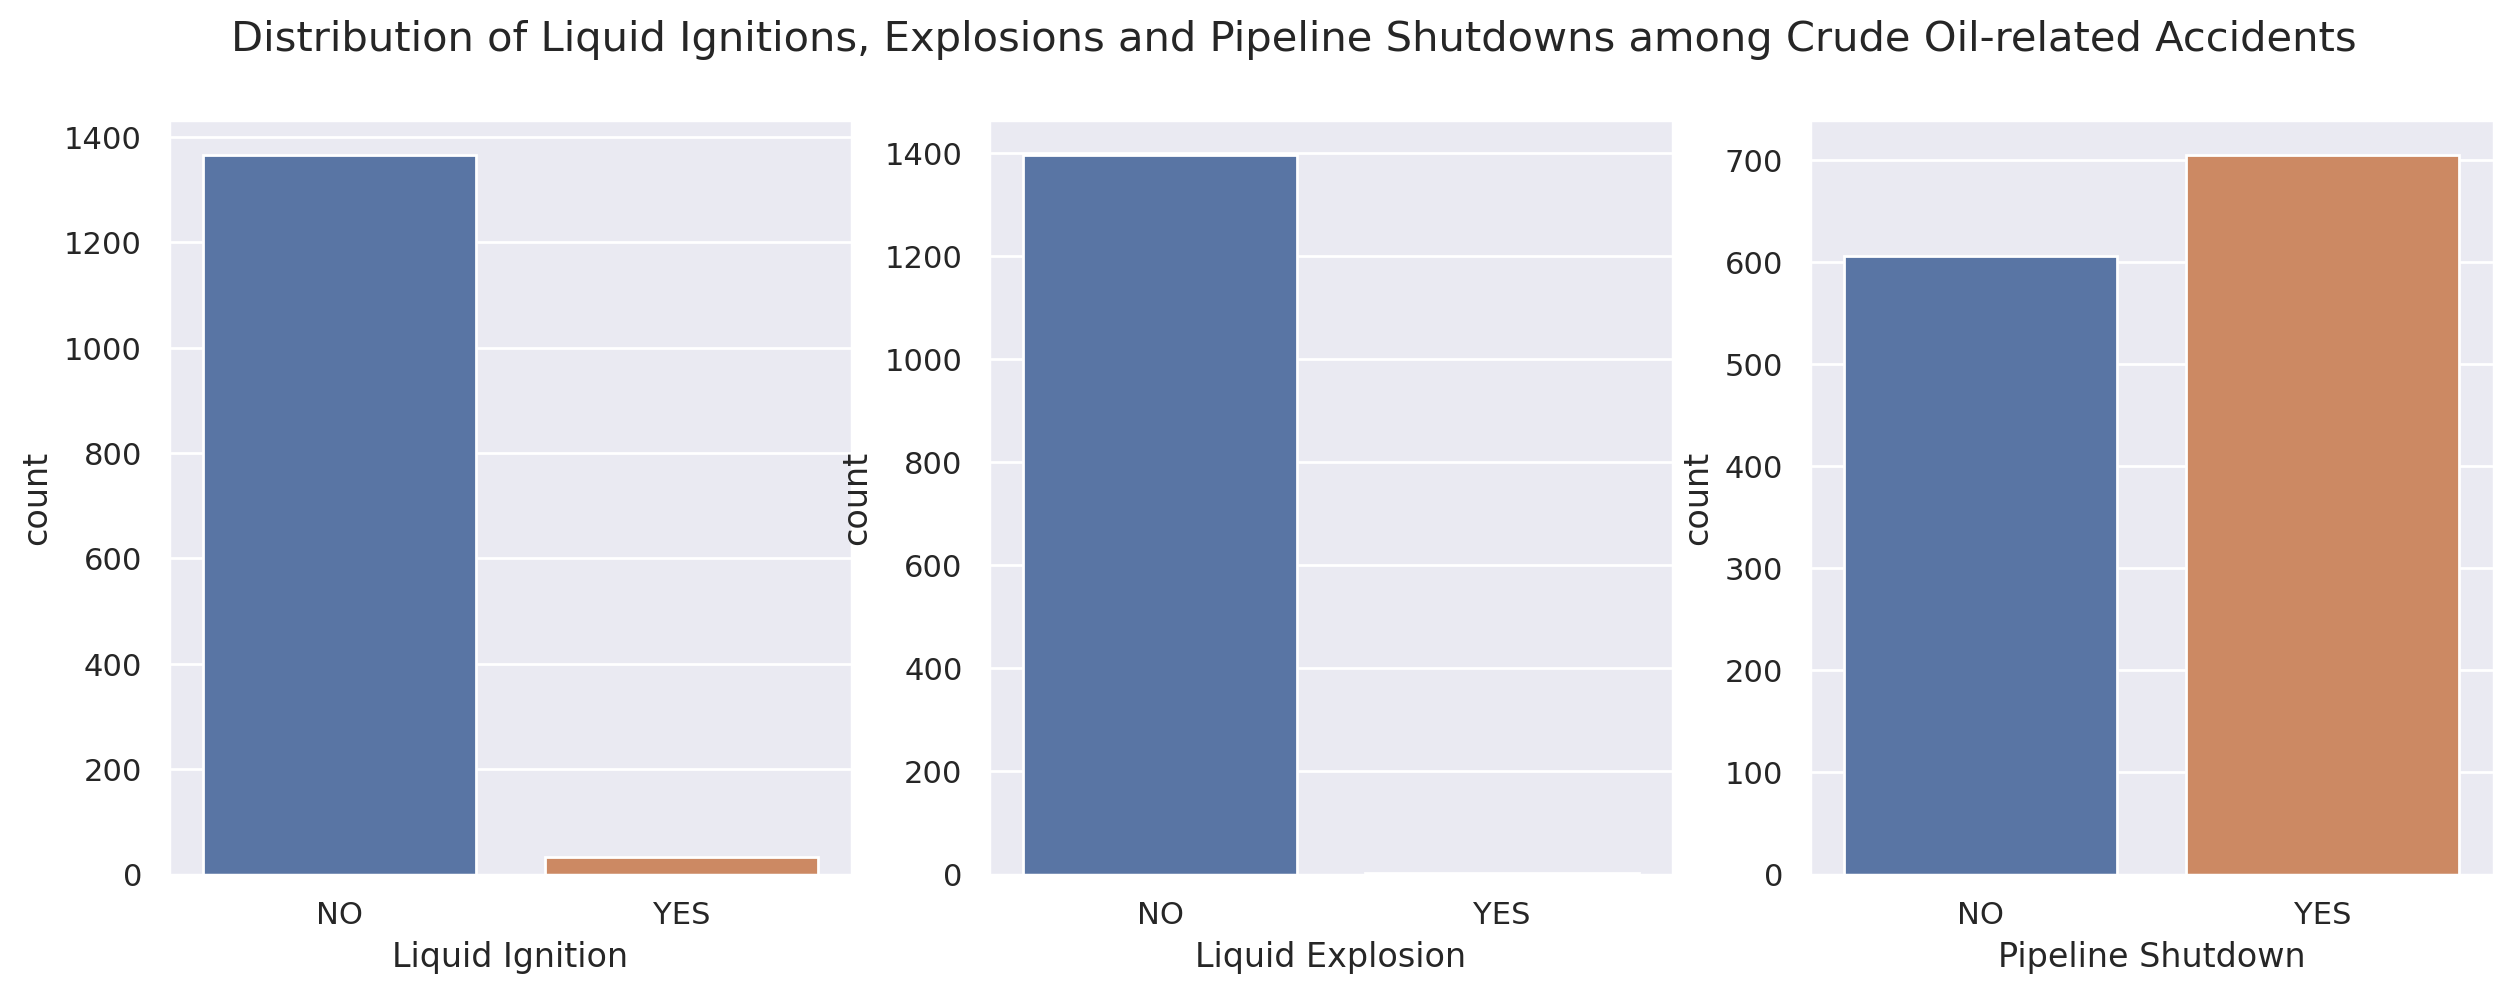

In [9]:
f, ax = plt.subplots(
    1,3, 
    figsize=(15, 5), 
    # sharey= True, 
    dpi= 200)
sns.countplot(
    data= crude_oil_df, 
    x= 'Liquid Ignition',
    ax= ax[0]
    )
sns.countplot(
    data= crude_oil_df, 
    x= 'Liquid Explosion',
    ax= ax[1]
    )
# ax[1].get_yaxis().set_visible(False)
sns.countplot(
    data= crude_oil_df, 
    x= 'Pipeline Shutdown',
    ax= ax[2]
    )
# ax[2].get_yaxis().set_visible(False)
# plt.tight_layout()
plt.suptitle('Distribution of Liquid Ignitions, Explosions and Pipeline Shutdowns among Crude Oil-related Accidents', fontsize=15)

Thoughts: <br>
Crude Oil Liquid Ignitions and Explosions are associated with the chemical properties of crude oil being transported via the pipelines. By the above plot, it is observed that liquid ignition cases were rare. And virtually no cases of liquid explosions were observed. <br>
Although, there were about 700 cases of Pipeline Shutdowns which may suggest that there was a spill/incident that resulted in the halting of operations for certain pipelines. <br>
<br>
Let's take a look at the causes of these Pipeline Shutdowns..


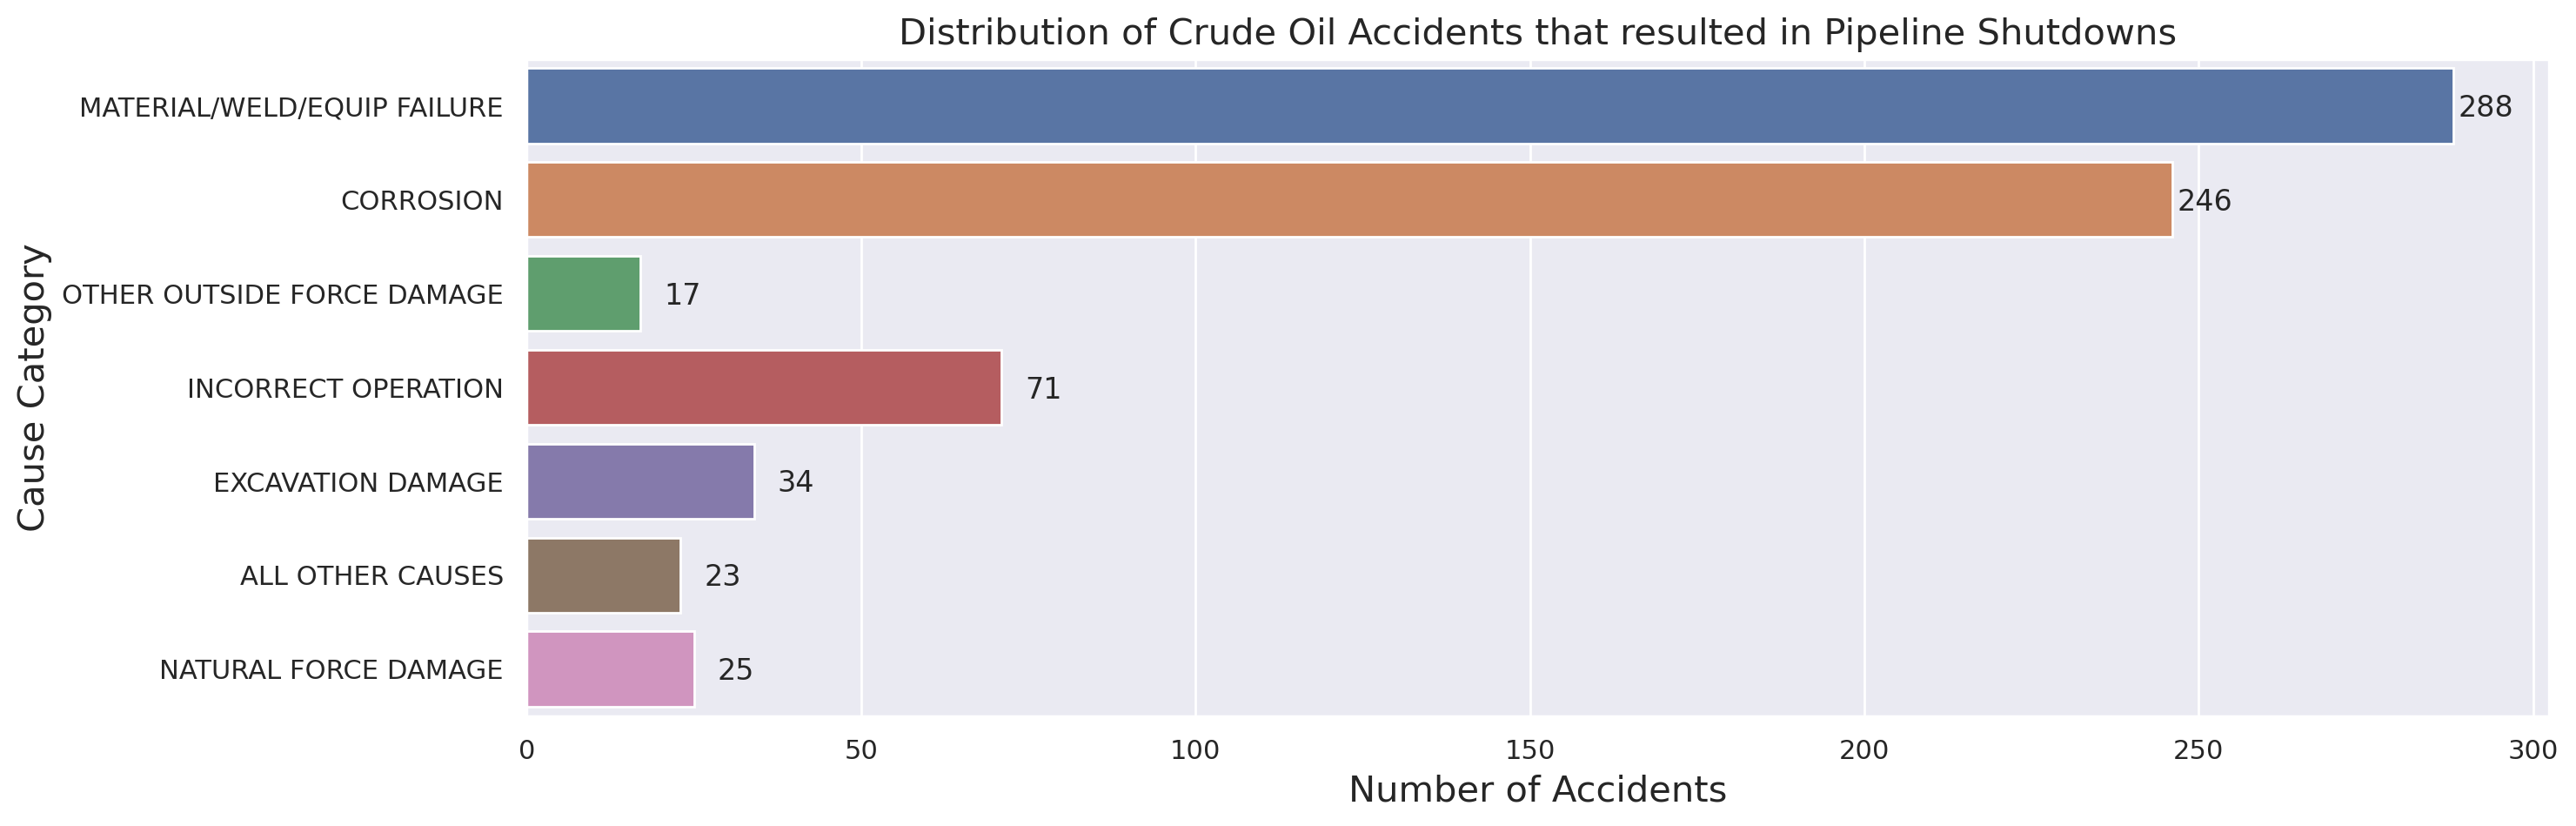

In [10]:
shutdown_df = crude_oil_df[crude_oil_df['Pipeline Shutdown'] == 'YES']
f, ax = plt.subplots(1,1, figsize=(15, 5), dpi= 200)
sns.countplot(
    data= shutdown_df, 
    y= 'Cause Category',
    ax= ax
    )
plt.title('Distribution of Crude Oil Accidents that resulted in Pipeline Shutdowns', fontsize=15)
plt.xlabel('Number of Accidents', fontsize=15)
plt.ylabel('Cause Category', fontsize=15)

for p in ax.patches:
    ax.annotate(
        int(p.get_width()),
        ((p.get_x() + p.get_width()), p.get_y()), 
        xytext=(25, -20),
        fontsize=12,
        textcoords='offset points', 
        horizontalalignment='right')

Thoughts: <br>
The distribution of Crude Oil-related accident occurences that caused Pipeline Shutdowns shows an interesting trend. It is observed that a vast majority (over 500 out of 700) of shutdown occurences were due to Material/Equipment failure or Corrosion-related incidents. <br>
This further reinforces the argument that there should be enough consideration and investment in selecting the materials used in building the infrastructure of crude oil pipelines so that corrosion and equipment failure-related incidents are avoided.

## Regulations on the properties of Crude Oil <br>



1. The density and viscosity of raw crude oil depends on the component hydrocarbons present in the oil itself being transported. The presence of Bitumen or Asphaltenes in the crude oil contributes to very high viscosity. Raw bitumen is impossible to transport via pipelines without being heated or diluted (to reduce its viscosity). The composition of diluents also affects the weathering patterns of the transported liquid [6]. <br> The selection of diluents depends on what outcome is desired, cost of acquisition and transporting these diluents to raw crudes, and also confidential reasons of individual pipeline operators. <br>

2. Light Crude, Medium Crude and Heavy Crude have flash points increasingly ranging from -30 °C to -3 °C [6]. Although Weathering does cause an increase in the flashpoint, it also causes recovery losses in an even of a spill. <br> Under the Workplace Hazardous Materials Information System (WHMIS) 1988, flammable liquids have a flashpoint below 37.8°C (100°F). In the case of transporting crude oils via pipelines, crude oil with flash point less than 60 °C should be avoided for transportation.

3. There hasn't been much research for quantifying the level of hazard associated with higher vapour pressures in crude oil transportations. The standardized Vapour Pressure testing and measurement methods used by US' PHMSA, Transport Canada's TDG, and pipeline operators were not consistent throughout 2013 to 2015 [10]. <br>
Determining whether Vapour Pressure has a direct correlation with the severity of pipeline accidents needs more research. It is recommended [10] that rather than changing the physical and chemical properties of the transported crude oils, preventative efforts should be undertaken to reduce the risks of incidents. However, until concrete research is made publicly available, HVP fluids should be modified into non-volatile fluids to avoid unnecessary accidents.

## Over the years..

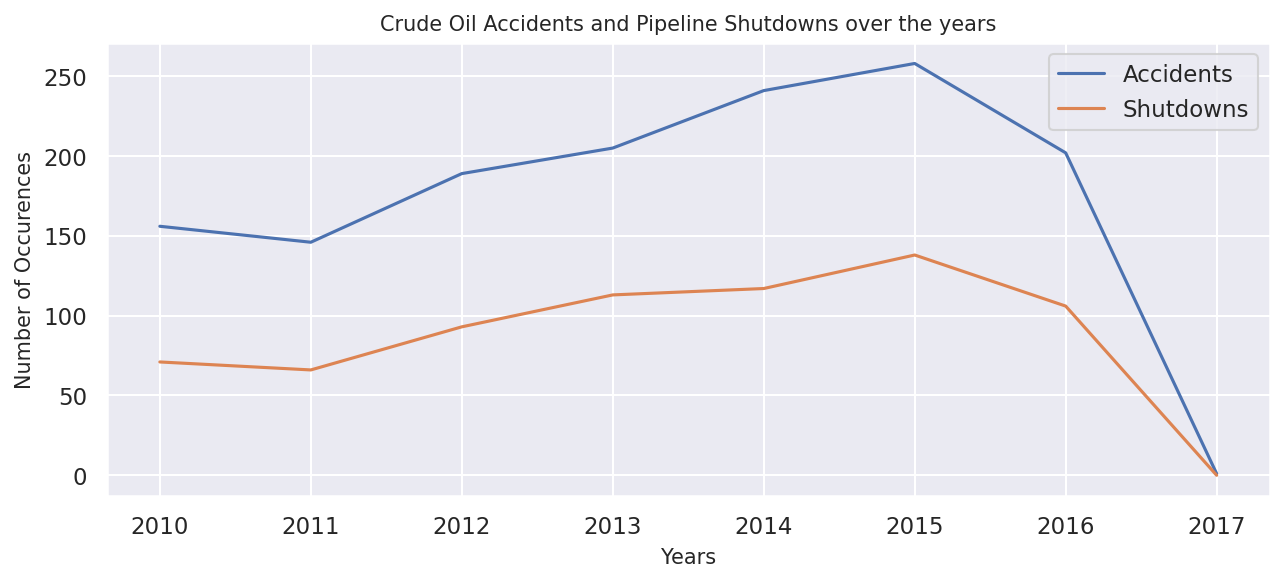

In [11]:
# Crude oil accidents and shutdowns over the years
temp_crude = crude_oil_df.copy()
temp_crude['Accident Year'] = temp_crude['Accident Date/Time'].dt.year
years = temp_crude['Accident Year'].unique()
accident_count = []
shut_count = []
for year in years:
    temp = temp_crude[temp_crude['Accident Year'] == year]
    accident_count.append(len(temp))
    shuts = temp[temp['Pipeline Shutdown'] == 'YES']
    shut_count.append(len(shuts))

f, ax = plt.subplots(1,1, figsize=(10, 4), dpi= 150)
sns.lineplot(x=years, y=accident_count, label='Accidents', ax=ax)
sns.lineplot(x=years, y=shut_count, label='Shutdowns', ax=ax)
plt.title('Crude Oil Accidents and Pipeline Shutdowns over the years', fontsize=10)
plt.ylabel('Number of Occurences', fontsize=10)
plt.xlabel('Years', fontsize=10)
ax.legend(labels= ['Accidents', 'Shutdowns'])

Thoughts: <br>
Over the years 2010 to 2017, we see a promising pattern in terms of the number of accident occurences and the number of pipeline shutdowns enforced. <br> A peak value is observed in years 2014-2015 for both Crude oil accidents and Pipeline Shutdowns, and after that a downward trend is observed. However, it must be noted that the PHMSA dataset contains data for only January 2017, so statistics related to 2017 may not be accurate. <br>
<br>
Let's explore the amounts of crude oils lost in spills over the years..


<AxesSubplot:title={'center':'Distribution of Oil Spills, Recovery and Net Losses'}, xlabel='Accident Year', ylabel='Barrels'>

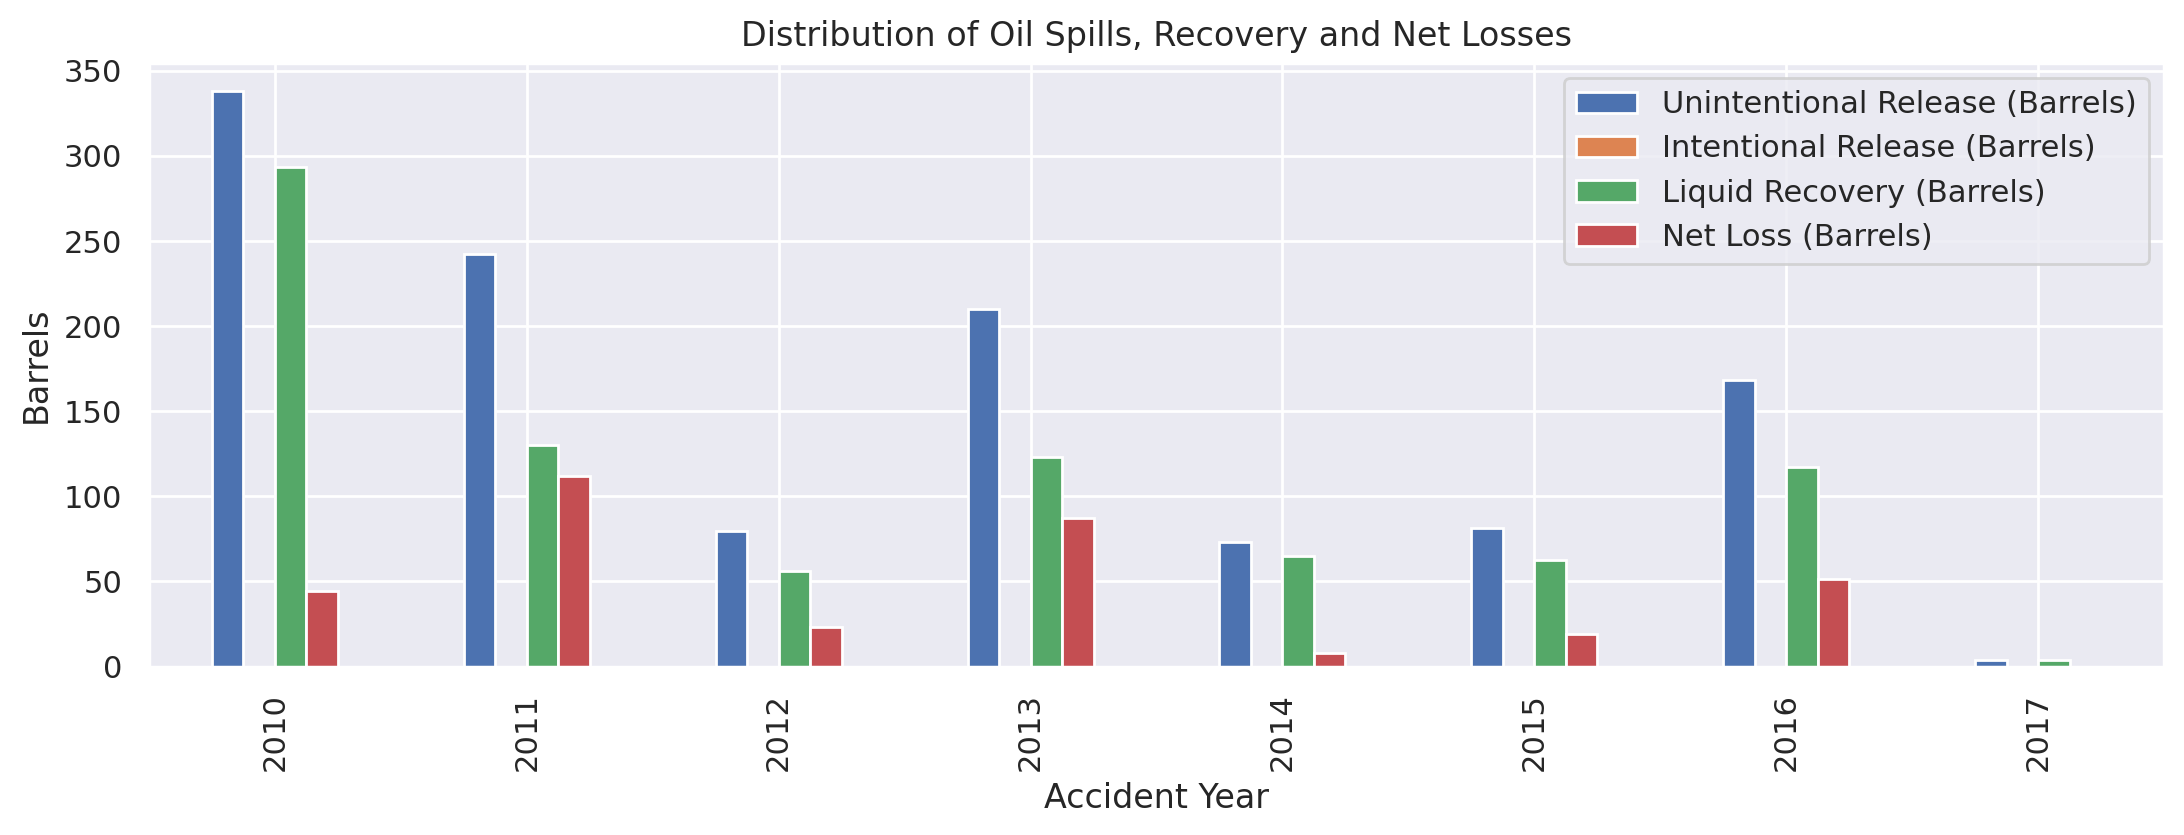

In [12]:
grouped_crude = temp_crude.groupby(by=['Accident Year']).mean()
f, ax = plt.subplots(1,1, figsize=(13, 4), dpi= 200)
grouped_crude[['Unintentional Release (Barrels)', 'Intentional Release (Barrels)', 'Liquid Recovery (Barrels)',	'Net Loss (Barrels)']].plot(
    kind='bar',
    ax=ax,
    title='Distribution of Oil Spills, Recovery and Net Losses',
    ylabel= "Barrels"
    )

Thoughts: <br>
Over the years 2010 to 2017, a general downward trend is observed when comparing the Unintentional & Intentional Liquid releases, Liquid recoveries, and the Net Losses of Crude oil. <br> Unintentional releases are always the most significant as compared to other types of liquid losses citing that accident occurences contribute to the majority of crude oil lost. <br> There is nearly zero impact of Intentional crude oil releases. This is due to the fact that these occur during a carefully monitored maintenence operations, and the amount of liquid spilled intentionally is usually fully recovered. <br> The Liquid recovery in an event of an unintentional spill must ideally be on par with the amount of unintentional releases. However, that is not the case in real-life, with the recovery amounts always trailing lower than the unintentional release amounts. <br> The Net Losses ideally should be zero. But due to weathering, adhesion and other natural phenomena, it becomes impossible to recover 100% of the lost crude oils. Hence, we see some amount of Net Loss always present in each year.

## Final Thoughts: <br>
* The United States' Department of Transportation's Pipeline and Hazardous Materials Safety Administration Dataset is used to evaluate the historical occurences of Hazardous Liquid Pipeline Accidents. A comprehensive analysis of the hazardous liquids present in these accidents and the accident's causes is provided.
* Crude Oil, in particular, is taken as a main subject, and its accident causes are examined. The physical and chemical properties of crude oil are studied and related to the findings observed in the causes of accidents in the data. 
* Some recommendations to reduce and/or mitigate the effects of accident-related causes like corrosion are provided. Current government regulations regarding the properties of crude oils are briefly discussed, and suggestions are put forth.
* Consequences of accidents over time are studied and a comparative analysis of Hazardous Liquid losses over the years is also provided. 


### References
[1] URL: https://www.fraserinstitute.org/research/safety-transportation-oil-and-gas-pipelines-or-rail <br>
[2] United States' Pipeline and Hazardous Material Safety Administration. URL: https://www.phmsa.dot.gov/ <br>
[3] Oil Pipeline Accidents Data, 2010-2017. URL: https://www.kaggle.com/usdot/pipeline-accidents
[4] 49 CFR 195.2 “Component” URL: https://www.ecfr.gov/current/title-49/subtitle-B/chapter-I/subchapter-D/part-195#p-195.2(Carbon%20dioxide) <br>
[5] Hollebone, B., The Oil Properties Data Appendix. In Handbook of Oil Spill Science and Technology, Fingas, M., Ed. John Wiley and Sons Inc.: NY, 2015; pp 577-681. <br>
[6] National Academies of Sciences, Engineering, and Medicine. 2016. Spills of Diluted Bitumen from Pipelines: A Comparative Study of Environmental Fate, Effects, and Response. Washington, DC: The National Academies Press. https://doi.org/10.17226/21834. <br>
[7] Jokuty, P.; Whiticar, S.; Fingas, M.; Meyer, E.; Knobel, C., Hydrocarbon Groups and Their Relationship to Oil Properties and Behavior. In Proceedings of the 18th Arctic and Marine Oilspill Program (AMOP) Technical Seminar, Environment Canada: Ottawa, Canada, 1995; pp 1-19. <br>
[8] URL: https://www.corrosionpedia.com/the-6-corrosive-components-that-can-be-found-in-crude-oil/2/1424#:~:text=Crude%20oil%2C%20as%20a%20mixture,overhead%20lines%2C%20exchangers%20and%20condensers. <br>
[9] URL: https://www.corrosionpedia.com/introduction-to-managing-internal-corrosion-in-process-vessels/2/5358 <br>
[10] URL: https://www.bakerinstitute.org/media/files/files/76a0893d/bi-brief-032019-ces-crudeoil.pdf <br>


